# Coordinate Systems

Adapted from Chapter 3 *Working with Geographic and Projected Coordinate Systems* of **Applied Geospatial Data Science with Python**.

The key idea is that:

- The Earth is round.

- However, to represent the 3D Earth on a 2D surface, **map projections** and **coordinate reference system (CRS)** concepts are vital.

## Geographic Coordinate Systems

A 3D spheroid surface to define locations on the Earth's surface, represented by the **latitude** and **longitude**.

The longitude is represented by X and the latitude is represented by Y, and are measured in degrees.

The network of latitude and longitude lines are **graticule**.

![Earth Graticule](https://giscommons.org/files/2009/08/3.21.gif)

The lines that run from north to south are **meridians** and the central meridian is **prime meridian**.

The most common one is the one running through Greenwich, England, known as **Greenwich meridian**.

### World Geodetic System 1984

The **WGS 1984** is the standard for the GPS.

WGS 1984 uses Earth's center mass as coordinate system origin.

The well-known ID (WKID) of the WGS 1984 is 4326.

## Projected Coordinate Systems

Each PCS has a trade-off when maintaining shape, area, angles, scales etc.

### Equal-area Projections

Equal-area projections maintain the relative size of an area in a map.

For example, this is a Lambert cylindrical equal-area projection.

![Lambert cylindrical equal-area projection](https://gisgeography.com/wp-content/uploads/2016/12/North-America-Lambert-Conformal-Conic-Projection-1265x694.png)

### Behrmann Map Projection

The Behrmann Projection is a cylindrical equal-area projection, where 50% of the Earth's surface is stretched horizontally, and the other 50% is stretched vertically.

### Sinusoidal Map Projection

The sinusoidal projection is a pseudocylindrical equal-area projection, which displays all parallels
as well as the central meridian at true scale.

![Sinusoidal](https://upload.wikimedia.org/wikipedia/commons/c/c7/Usgs_map_sinousidal_equal_area.PNG)


## Data Exploration

Some packages like `geopandas` will be used to analyze geospatial datasets.

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [85]:
data_path = "data/"

In [86]:
# World Shapefile
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [87]:
# Capitals Shapefile
capitals = gpd.read_file(f'{data_path}/ne_110m_populated_places/ne_110m_populated_places.shp')
capitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [88]:
# 110m resolution graticule shapefile
grat = gpd.read_file(data_path + 'Graticule/ne_110m_graticules_10.shp')
grat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [89]:
# To check that all the CRS used by the datasets are the same
# WGS 1984
capitals.crs == world.crs == grat.crs

True

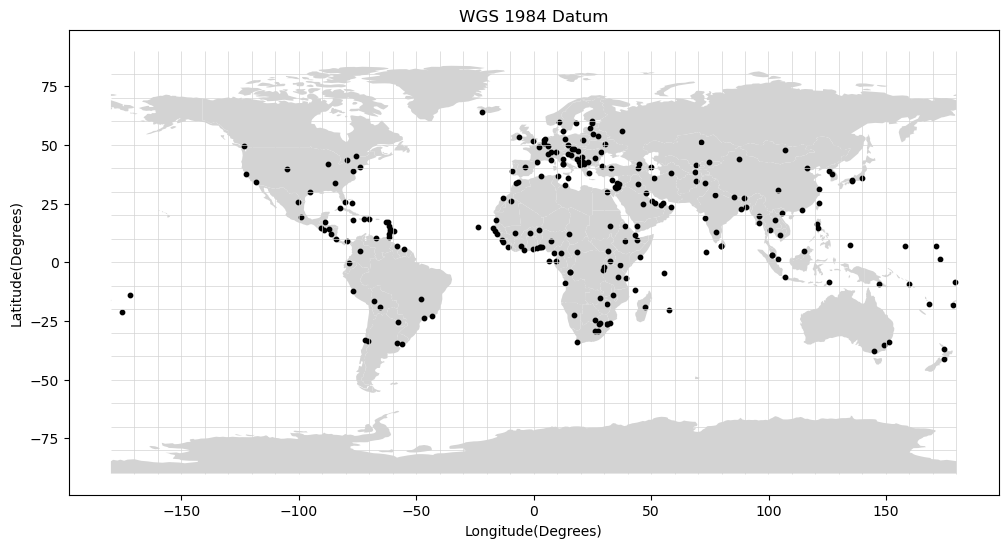

In [90]:
# Overlaying all the datasets onto the same map
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax=ax, color="lightgray")
capitals.plot(ax=ax, color="black", markersize=10, marker="o")
grat.plot(ax=ax, color="lightgray", linewidth=0.5)
ax.set(xlabel="Longitude(Degrees)", ylabel="Latitude(Degrees)", title="WGS 1984 Datum")
plt.show()